In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [3]:
# Load Data
data = fetch_olivetti_faces()
images = data.images
X = data.data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\sghor\scikit_learn_data


In [4]:
#computing mean and centered data
mean_face = np.mean(X, axis=0)
X_centered = X - mean_face

In [5]:
U, S, Vt = np.linalg.svd(X_centered, full_matrices=False)
variance_ratio = (S ** 2) / np.sum(S ** 2)
cumulative_variance = np.cumsum(variance_ratio)
k_90 = np.argmax(cumulative_variance >= 0.90) + 1
print(f"Number of components to explain 90% variance: {k_90}")

Number of components to explain 90% variance: 66


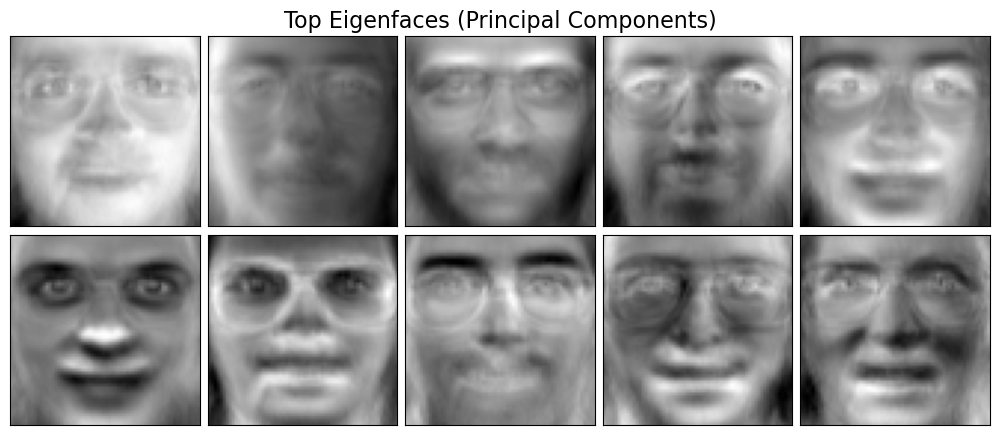

In [6]:
def plot_gallery(title, images, n_col=5, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images[:n_col * n_row]):
        plt.subplot(n_row, n_col, i + 1)
        # Reshape the 1D vector back to 2D image (64x64)
        plt.imshow(comp.reshape(64, 64), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

plot_gallery("Top Eigenfaces (Principal Components)", Vt)
plt.show()

In [7]:
# Reconstruction: Project and Reconstruct a face
original_face = X_centered[0] # Take the first face
# Project onto top k_90 components
weights = np.dot(original_face, Vt[:k_90].T) 
# Reconstruct
reconstructed_face = np.dot(weights, Vt[:k_90]) + mean_face

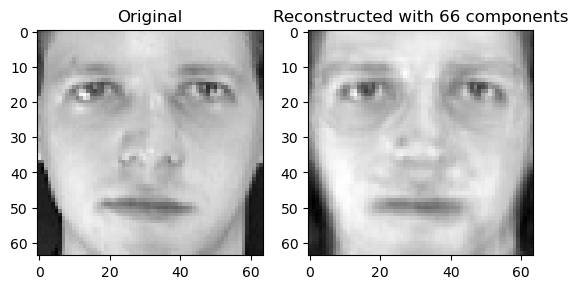

In [8]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X[0].reshape(64,64), cmap='gray')
ax[0].set_title("Original")
ax[1].imshow(reconstructed_face.reshape(64,64), cmap='gray')
ax[1].set_title(f"Reconstructed with {k_90} components")
plt.show()